## Lab 6: Linear Regression in R
#### MA 189 Data Dive Into Birmingham (with R)
##### _Blazer Core: City as Classroom_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/) 


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

<div class="alert alert-block alert-danger">
<b>Example</b>: Sales and Advertising Budget
</div>

Let's use the `marketing` dataset from `datarium` (Data Bank for Statistical Analysis and Visualization) package. It contains the impact of three advertising medias (youtube, facebook and newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales. The advertising experiment has been repeated 200 times with different budgets and the observed sales have been recorded. To illustrate linear regression with univariate, in this section, we will only consider the impact of advertising budget of youtube on sales.

In [1]:
# load libraries

library(datarium)
library(ggplot2)
library(broom) # creates a tidy data frame from statistical test results
library(ggfortify)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.1      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Load and inspect the marketing data 
data("marketing", package = "datarium")
str(marketing)
head(marketing, 4)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20


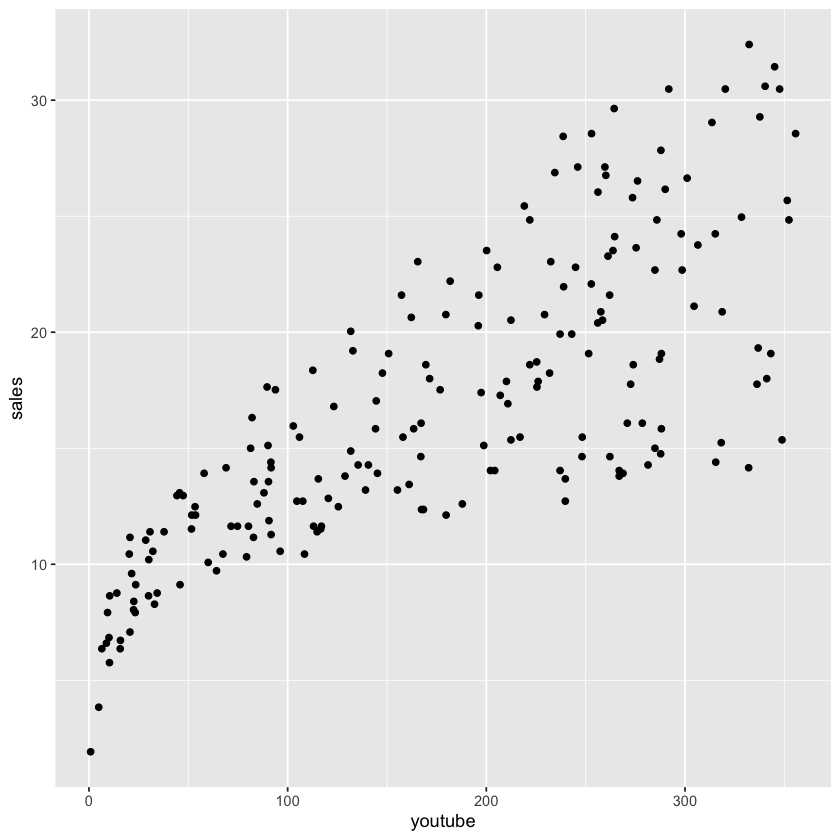

In [3]:
# Visualization 
ggplot(marketing, aes(x = youtube, y = sales)) +
  geom_point()

In [4]:
# Compute the correlation coefficient between the two variables
cor(marketing$sales, marketing$youtube)

[1] 0.7822244

It shows there is a strong correlation between `youtube` and `sales`. That is the preliminary to perform a simple linear regression analysis.

<div class="alert alert-block alert-danger">
    <b>Example</b>
</div>

Fit least square estimate on imported data via R function `lm()`.

In [2]:
model <- lm(sales ~ youtube, data = marketing)
model

ERROR: Error in eval(mf, parent.frame()): object 'marketing' not found


The estimated regression line is $sales =8.43911 +0.04754 \times youtube$.

In [9]:
model.arg <- augment(model)
head(model.arg)

sales,youtube,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.52,276.12,21.564929,4.9550706,0.009703067,3.904215,7.943433e-03,1.27334860
12.48,53.40,10.977569,1.5024311,0.012168549,3.918820,9.204340e-04,0.38657462
11.16,20.64,9.420269,1.7397315,0.016493630,3.918307,1.687550e-03,0.44861503
22.20,181.80,17.081273,5.1187265,0.005013546,3.903214,4.338753e-03,1.31230121
15.48,216.96,18.752662,-3.2726618,0.005776898,3.913319,2.046726e-03,-0.83934283
8.64,10.44,8.935395,-0.2953948,0.018047722,3.920242,5.340448e-05,-0.07623209


* .fitted: fitted values
* .resid: residual errors
* .hat: hat values, used to detect high-leverage points (or extreme values in the predictors x variables).

    A value of this statistic above $2(p + 1)/n$ indicates an observation with high leverage.
* .std.resid: standardized residuals, which is the residuals divided by their standard errors. Used to detect outliers (or extreme values in the outcome y variable)
* .cooksd: Cook’s distance, used to detect influential values, which can be an outlier or a high leverage point

`geom_smooth()` using formula = 'y ~ x'


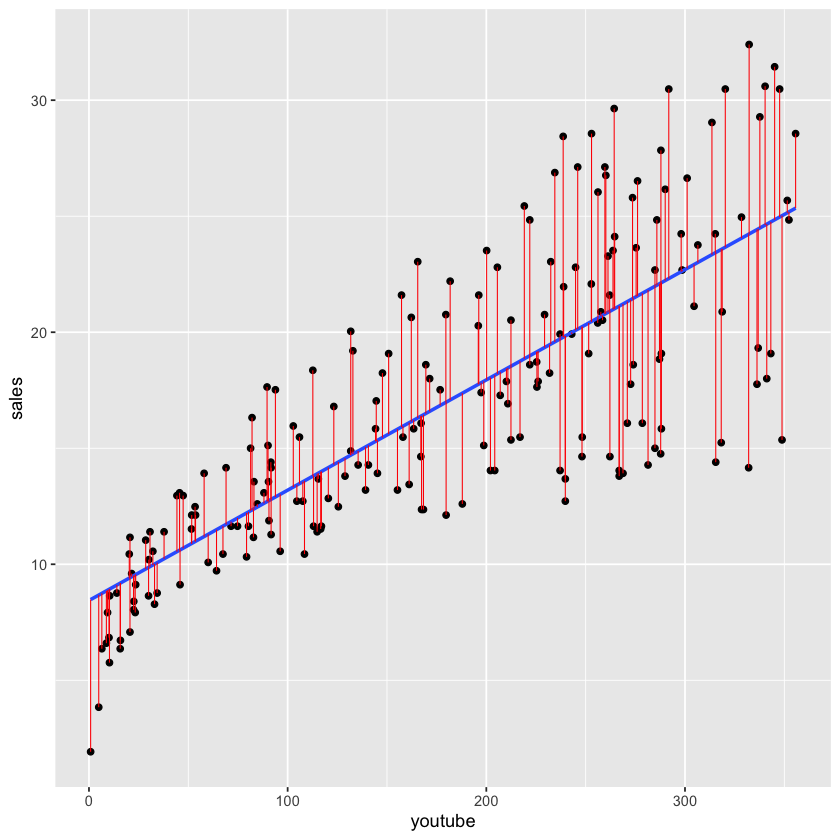

In [10]:
ggplot(model.arg, aes(x = youtube, y = sales)) +
  geom_point()+
  stat_smooth(method = lm, se = FALSE) +
  geom_segment(aes(xend = youtube, yend = .fitted), color = "red", linewidth = 0.3)

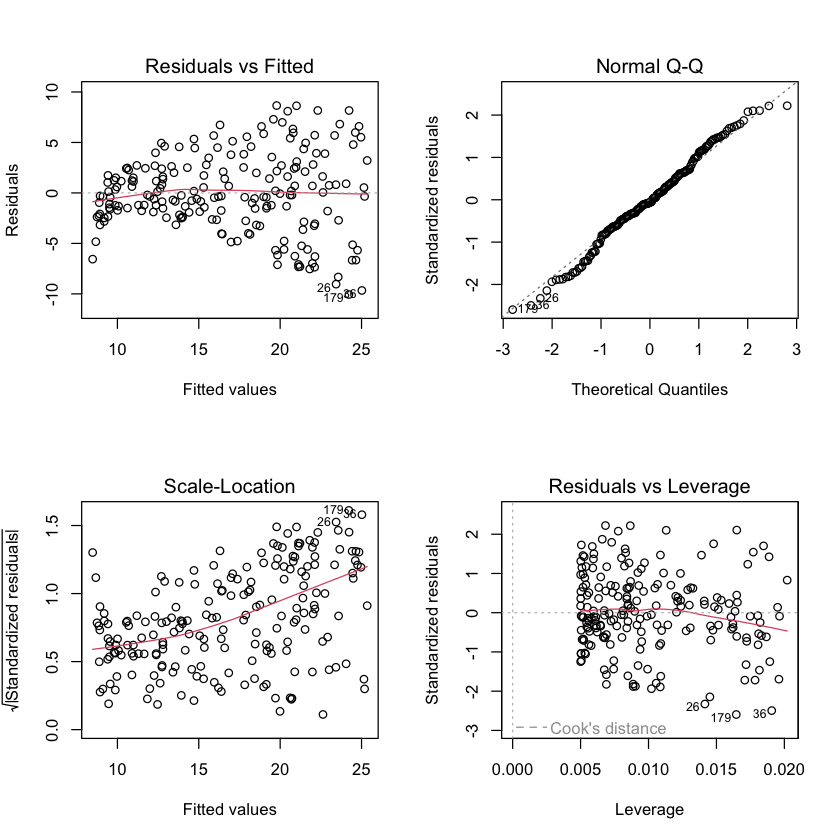

In [11]:
par(mfrow = c(2, 2))
plot(model)

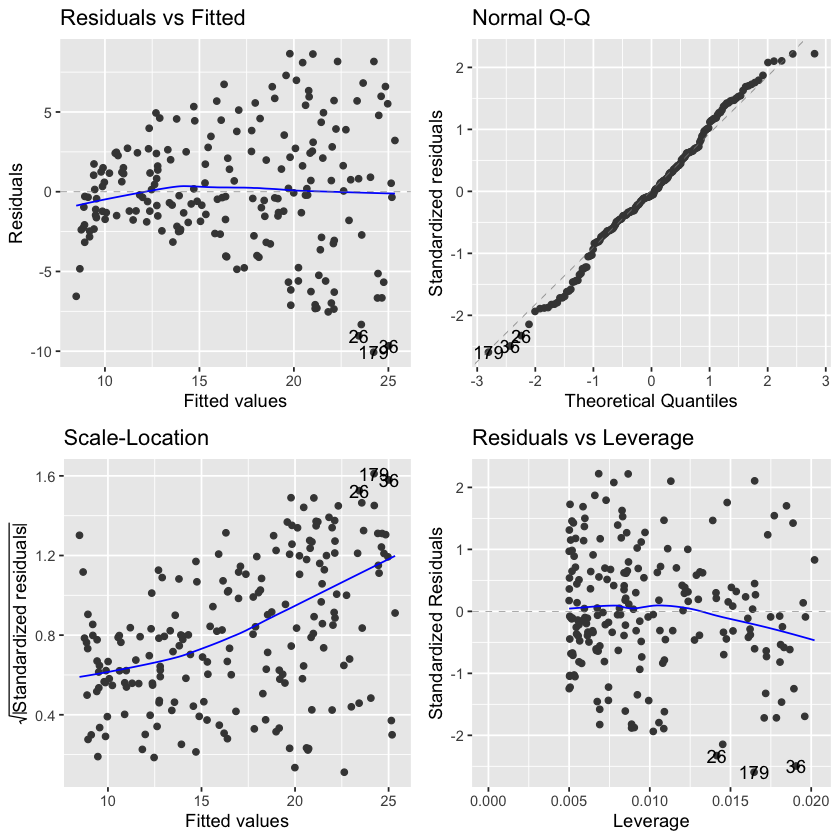

In [12]:
autoplot(model)

In [13]:
# Add observations indices and
# drop some columns (.se.fit, .sigma) for simplification
model.arg %>%
  mutate(index = 1:nrow(model.arg)) %>%
  filter(index %in% c(26,36,179))

sales,youtube,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
14.40,315.48,23.43597,-9.035972,0.01415107,3.866308,0.03887305,-2.327287,26
15.36,348.84,25.02179,-9.661794,0.01906955,3.858197,0.06049366,-2.494703,36
14.16,332.04,24.22318,-10.063178,0.01646090,3.853064,0.05634703,-2.594894,179


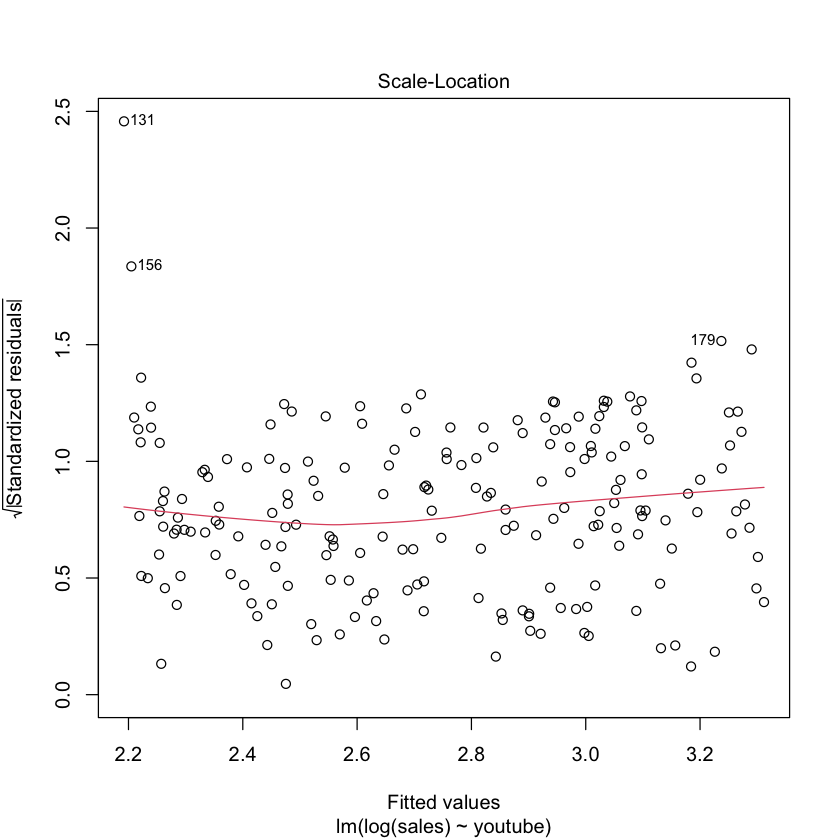

In [14]:
model2 <- lm(log(sales) ~ youtube, data = marketing)
plot(model2, 3)

### <div class="alert alert-block alert-danger"><b>Lab Discussion (Assignment Part 1) </b></div>
1. Load the `marketing` dataset from `datarium` package. Perform simple regression analysis to check the impact of `facebook` and `newspaper` on `sales` respectively. Compare them with `youtube` based on the analysis results. Which of them has the most influence on `sales`? Why? Please show all R scripts and corresponding results you used for this question. Add more cells if needed.

In [ ]:
library(datarium)
library(ggplot2)
library(broom) # creates a tidy data frame from statistical test results
library(ggfortify)
library(tidyverse)

data("marketing", package = "datarium")

# input your R scripts here

##### Your answer:


2. If you have advertising budget of \$10,000, how should you allocate it on the above advertising medias to maximize your sales? Why?

In [ ]:
# input your R scripts here

##### Your answer:


### <div class="alert alert-block alert-danger"><b>Practice in Birmingham (Assignment Part II) </b></div>


Educational finance is important because it plays a crucial role in ensuring that all students have access to high-quality education. A well-funded education system can provide students with the resources and facilities they need to learn and succeed, regardless of their background or socioeconomic status.

Capital outlay expenditure is an important index for a school district as it helps to ensure that the district has the necessary infrastructure and resources to provide students with a high-quality education. It also helps to promote economic growth and development in the surrounding community.

The United States Census Bureau conducts annual surveys to assess the finances of elementary and high schools all over United States. We want to dig in such an educational finances dataset from [Kaggle](https://www.kaggle.com/datasets/noriuk/us-educational-finances) to learn which factors affect the capital outlay expenditure in Alabama school districts.

There are several possible factors affecting capital outlay expenditure in a school district, including enrollment growth, facility maintenance needs, technology upgrades, economic conditions, state and federal regulations.

Please use the dataset to check if there is any evidence supporting the above statement, or any other new factors identified during the analysis.

1. Go to the [Kaggle](https://www.kaggle.com/datasets/noriuk/us-educational-finances) website to download the dataset file `districts.csv` to your local directory where this `.ipynb` file is. Be sure to read the details of this dataset as they may be helpful to your following analyses. 
2. Use the following R scripts to read your downloaded `districts.csv` file and extract school districts from Alabama state only to a new object `districts_AL`.

In [1]:
library(data.table)
districts <- fread("districts.csv")
districts_AL <- districts[STATE=="Alabama"]
districts_AL

Warning message:
“package ‘data.table’ was built under R version 4.2.3”


STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Alabama,9609,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401,1506
Alabama,30931,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439,9749
Alabama,912,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975,110
Alabama,2842,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274,4133
Alabama,3322,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122,486
Alabama,7870,BLOUNT COUNTY SCHOOL DISTRICT,2016,69966,6929,48563,14474,68297,37442,22662,5500,2193
Alabama,1477,ONEONTA CITY SCHOOL DISTRICT,2016,13464,992,8541,3931,12726,6999,3758,1541,214
Alabama,1505,BULLOCK COUNTY SCHOOL DISTRICT,2016,14876,3061,9273,2542,14713,6996,6006,1542,31
Alabama,3135,BUTLER COUNTY SCHOOL DISTRICT,2016,32062,6439,18770,6853,31393,16091,10523,2950,471


3. Use an R script to analyze this dataset to show how other variables, for example, **Total Expenditure**(`TOTAL_EXPENDITURE`), affect __Capital Outlay Expenditure__(`CAPITAL_OUTLAY_EXPENDITURE`). Please create another Jupyter notebook to write a full report.